## Feed-Forwad Neural network 


In [6]:
## we will take these steps 
  ## Datalouder ,Transformations
  ##Multi layer neural net ,activatoin function 
  ## loss and optimizer 
  ## Training loop (we will use batch training)
  ## Model Evalution 
  ### at the end we will try if our code can support GPU

##
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms  
 

In [69]:
##hyper paramaters 
input_size = 784 
hidden_size = 100
num_classes = 10 
num_epochs = 20
batch_size = 100 
learning_rate = 0.001

In [70]:
##data louding 
train_data = torchvision.datasets.MNIST(root='/home/iamismail/Rebirth Pytorch',train=True , transform=transforms.ToTensor() ,download=True)
test_data = torchvision.datasets.MNIST(root='/home/iamismail/Rebirth Pytorch',train=False, transform= transforms.ToTensor())

##data louders 
train_louder = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size, shuffle=True)
test_louder = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

In [71]:
##looking one batch of our dat 
examples = iter(train_louder)
samples ,labels = examples.next()
print(samples.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


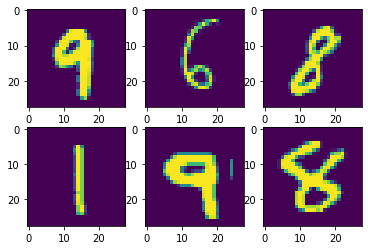

In [72]:
for i in range(6) :
    plt.subplot(2,3,i+1) 
    plt.imshow(samples[i][0])
plt.show()

##our goal is to classify these images into 10 digits , so we will setup fully connected neural network with one hidden layer



In [73]:
##our goal is to classify these images into 10 digits , so we will setup fully connected neural network with one hidden layer

class Neuralnetwork(nn.Module):
    def __init__(self, input_size, hidden_size,num_classes):
        super(Neuralnetwork,self).__init__()

        ##our layers 
        self.layer1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.layer2 =nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)

        return output

In [74]:
model = Neuralnetwork(input_size=input_size,hidden_size=hidden_size,num_classes=num_classes)

##loss and optimzier 
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr =learning_rate)


In [75]:
##Training loop 
n_total_steps = len(train_data)

for epochs in range(num_epochs):
    for i, (images,labels) in enumerate(train_louder):

        ### our image shape is 100,1,28 ,28 so we need to reshape coz our inputsize is 784 so it should be (100 ,784)
        images = images.reshape(-1,28*28)
         
    #forward 
    outputs = model(images)
    loss = criterian(outputs,labels)
    ## backward 
    optimizer.zero_grad()
    loss.backward()

    ##update paramaters 
    optimizer.step()

    ##printing the loss

    if (i+1) %100 ==0 :
        print(f"epochs {epochs +1} /{num_epochs},step :{i+1} /{n_total_steps} loss :{loss.item():4f}")

    ##loss 
    
    ##gradient 

epochs 1 /20,step :600 /60000 loss :2.303263
epochs 2 /20,step :600 /60000 loss :2.266087
epochs 3 /20,step :600 /60000 loss :2.235454
epochs 4 /20,step :600 /60000 loss :2.179824
epochs 5 /20,step :600 /60000 loss :2.145357
epochs 6 /20,step :600 /60000 loss :2.110506
epochs 7 /20,step :600 /60000 loss :2.057935
epochs 8 /20,step :600 /60000 loss :2.005000
epochs 9 /20,step :600 /60000 loss :1.938236
epochs 10 /20,step :600 /60000 loss :1.899732
epochs 11 /20,step :600 /60000 loss :1.901710
epochs 12 /20,step :600 /60000 loss :1.806382
epochs 13 /20,step :600 /60000 loss :1.818336
epochs 14 /20,step :600 /60000 loss :1.736058
epochs 15 /20,step :600 /60000 loss :1.617002
epochs 16 /20,step :600 /60000 loss :1.679643
epochs 17 /20,step :600 /60000 loss :1.686057
epochs 18 /20,step :600 /60000 loss :1.533893
epochs 19 /20,step :600 /60000 loss :1.512378
epochs 20 /20,step :600 /60000 loss :1.461667


In [76]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_louder:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 75.92 %
